## 데이터 불러오기 및 전처리

### 데이터의 형태 파악

In [1]:
# https://datalab.visitkorea.or.kr/datalab/portal/tst/getEntcnyFrgnCustForm.do
# 목적별/국적별에서 2010~2021년의 데이터 다운로드

import pandas as pd 
kto_2021 = pd.read_csv('방한 외래관광객_20211112.csv', 
                          header=1,
                          skipfooter=4)
kto_2021.head()

/home/sjhyeon/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sjhyeon/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sjhyeon/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,연도,월,대륙,국적,인원수,증감률(%),인원수.1,증감률(%).1,인원수.2,증감률(%).2,인원수.3,증감률(%).3,인원수.4,증감률(%).4,인원수.5,증감률(%).5
0,2010,01,아시아,중국,"91,252",-1.89,"40,425",-7.30,"11,930",22.33,55,66.67,"2,751",-5.17,"36,091",-1.70
1,2010,01,아시아,일본,"209,184",-12.04,"202,825",-11.93,"1,750",-25.63,89,-18.35,549,8.07,"3,971",-12.59
2,2010,01,아시아,대만,"36,399",-2.74,"35,788",-2.63,41,20.59,17,-37.04,37,-44.78,516,-4.97
3,2010,01,아시아,홍콩,"14,545",-42.30,"13,874",-43.16,55,57.14,0,0.00,21,133.33,595,-21.09
4,2010,01,아시아,마카오,554,-41.99,554,-41.99,0,0.00,0,0.00,0,0.00,0,0.00


In [2]:
kto_2021.tail()

,연도,월,대륙,국적,인원수,증감률(%),인원수.1,증감률(%).1,인원수.2,증감률(%).2,인원수.3,증감률(%).3,인원수.4,증감률(%).4,인원수.5,증감률(%).5
9592,2021,09,아프리카,아프리카 기타,982,70.78,42,133.33,141,354.84,20,300.00,152,85.37,627,42.82
9593,2021,09,아프리카 소계,NaN,"1,097",65.96,48,140.00,146,356.25,20,185.71,153,84.34,730,40.66
9594,2021,09,기타,국적미상,6,50.00,5,66.67,0,0.00,0,0.00,0,0.00,1,0.00
9595,2021,09,기타 소계,NaN,6,50.00,5,66.67,0,0.00,0,0.00,0,0.00,1,0.00
9596,2021,09,교포,교포,"1,328",31.23,0,0.00,0,0.00,0,0.00,0,0.00,"1,328",31.23


### 데이터 전처리 하기

In [3]:
# 증감률 필드 삭제 및 필드명 수정
# 인원수 -> 총인원수
# 인원수.1 -> 관광
# 인원수.2 -> 상용
# 인원수.3 -> 공용
# 인원수.4 -> 유학연수
# 인원수.5 -> 기타
kto_2021.columns

Index(['연도', '월', '대륙', '국적', '인원수', '증감률(%)', '인원수.1', '증감률(%).1', '인원수.2',
       '증감률(%).2', '인원수.3', '증감률(%).3', '인원수.4', '증감률(%).4', '인원수.5',
       '증감률(%).5'],
      dtype='object')

In [4]:
kto_2021.drop(['증감률(%)', '증감률(%).1', '증감률(%).2', '증감률(%).3', '증감률(%).4', '증감률(%).5'], axis='columns', inplace=True)
kto_2021.rename(columns = {'인원수': '총인원수', '인원수.1': '관광', '인원수.2': '상용', '인원수.3': '공용', '인원수.4': '유학연수', '인원수.5': '기타'}, inplace = True)

kto_2021.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타
0,2010,01,아시아,중국,"91,252","40,425","11,930",55,"2,751","36,091"
1,2010,01,아시아,일본,"209,184","202,825","1,750",89,549,"3,971"
2,2010,01,아시아,대만,"36,399","35,788",41,17,37,516
3,2010,01,아시아,홍콩,"14,545","13,874",55,0,21,595
4,2010,01,아시아,마카오,554,554,0,0,0,0


In [5]:
# 필드 형태 확인
kto_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 10 columns):
연도      9597 non-null object
월       9586 non-null object
대륙      9446 non-null object
국적      8460 non-null object
총인원수    9597 non-null object
관광      9597 non-null object
상용      9597 non-null object
공용      9597 non-null object
유학연수    9597 non-null object
기타      9597 non-null object
dtypes: object(10)
memory usage: 749.8+ KB


In [6]:
# object to int
kto_2021.replace(',','', regex=True, inplace=True)
kto_2021['총인원수'] = pd.to_numeric(kto_2021['총인원수'])
kto_2021['관광'] = pd.to_numeric(kto_2021['관광'])
kto_2021['상용'] = pd.to_numeric(kto_2021['상용'])
kto_2021['공용'] = pd.to_numeric(kto_2021['공용'])
kto_2021['유학연수'] = pd.to_numeric(kto_2021['유학연수'])
kto_2021['기타'] = pd.to_numeric(kto_2021['기타'])
kto_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 10 columns):
연도      9597 non-null object
월       9586 non-null object
대륙      9446 non-null object
국적      8460 non-null object
총인원수    9597 non-null int64
관광      9597 non-null int64
상용      9597 non-null int64
공용      9597 non-null int64
유학연수    9597 non-null int64
기타      9597 non-null int64
dtypes: int64(6), object(4)
memory usage: 749.8+ KB


In [7]:
kto_2021.describe()

,총인원수,관광,상용,공용,유학연수,기타
count,9.597000e+03,9.597000e+03,9597.000000,9597.000000,9597.000000,9.597000e+03
mean,5.659365e+04,4.389206e+04,942.111702,199.783474,992.255913,1.056744e+04
std,4.693488e+05,3.700736e+05,7818.593084,1651.870044,8736.412230,8.416681e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.190000e+02,3.260000e+02,11.000000,1.000000,6.000000,1.820000e+02
50%,2.158000e+03,1.064000e+03,44.000000,5.000000,26.000000,6.420000e+02
75%,1.183800e+04,6.365000e+03,255.000000,33.000000,104.000000,2.470000e+03
max,1.750276e+07,1.443228e+07,297069.000000,74210.000000,375661.000000,2.819208e+06


In [8]:
# 기준년월 컬럼 생성하기 
kto_2021['기준년월'] = kto_2021['연도'] + kto_2021['월']
kto_2021.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001
1,2010,01,아시아,일본,209184,202825,1750,89,549,3971,201001
2,2010,01,아시아,대만,36399,35788,41,17,37,516,201001
3,2010,01,아시아,홍콩,14545,13874,55,0,21,595,201001
4,2010,01,아시아,마카오,554,554,0,0,0,0,201001


In [9]:
# unique()
kto_2021['국적'].unique()

array(['중국', '일본', '대만', '홍콩', '마카오', '필리핀', '인도네시아', '태국', '베트남', '인도',
       '말레이시아', '싱가포르', '몽골', '우즈베키스탄', '미얀마', 'GCC', '카자흐스탄', '터키',
       '캄보디아', '스리랑카', '방글라데시', '파키스탄', '이스라엘', '이란', '아시아 기타', nan, '미국',
       '캐나다', '브라질', '멕시코', '아메리카 기타', '러시아', '영국', '독일', '프랑스', '이탈리아',
       '네덜란드', '우크라이나', '스페인', '루마니아', '노르웨이', '스웨덴', '폴란드', '스위스',
       '포르투갈', '오스트리아', '핀란드', '벨기에', '크로아티아', '그리스', '불가리아', '덴마크',
       '아일랜드', '유럽 기타', '오스트레일리아', '뉴질랜드', '오세아니아 기타', '남아프리카공화국',
       '아프리카 기타', '국적미상', '교포'], dtype=object)

In [10]:
kto_2021['대륙'].unique()

array(['아시아', '아시아 소계', '아메리카', '아메리카 소계', '유럽', '유럽 소계', '오세아니아',
       '오세아니아 소계', '아프리카', '아프리카 소계', '기타', '기타 소계', '교포', '교포 소계', nan],
      dtype=object)

In [11]:
# '소계'가 들어간 row 삭제
kto_2021['대륙'] = kto_2021['대륙'].astype('str')
searchfor = ['소계', '기타', 'nan']
kto_2021 = kto_2021[~kto_2021.대륙.str.contains('|'.join(searchfor))]
kto_2021.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001
1,2010,01,아시아,일본,209184,202825,1750,89,549,3971,201001
2,2010,01,아시아,대만,36399,35788,41,17,37,516,201001
3,2010,01,아시아,홍콩,14545,13874,55,0,21,595,201001
4,2010,01,아시아,마카오,554,554,0,0,0,0,201001


In [12]:
# 연도월-나라별 총인원수 관광객비율(%) 컬럼 생성하기 
kto_2021['관광객비율(%)'] = \
round(kto_2021['관광'] / kto_2021['총인원수'] * 100, 1)
kto_2021.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%)
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001,44.3
1,2010,01,아시아,일본,209184,202825,1750,89,549,3971,201001,97.0
2,2010,01,아시아,대만,36399,35788,41,17,37,516,201001,98.3
3,2010,01,아시아,홍콩,14545,13874,55,0,21,595,201001,95.4
4,2010,01,아시아,마카오,554,554,0,0,0,0,201001,100.0


In [13]:
# 관광객비율(%) 컬럼으로 내림차순 정렬
kto_2021.sort_values(by='관광객비율(%)', ascending=False).head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%)
1638,2012,01,아시아,마카오,1578,1578,0,0,0,0,201201,100.0
8378,2020,04,아시아,마카오,1,1,0,0,0,0,202004,100.0
4,2010,01,아시아,마카오,554,554,0,0,0,0,201001,100.0
821,2011,01,아시아,마카오,508,508,0,0,0,0,201101,100.0
208,2010,04,아시아,마카오,473,473,0,0,0,0,201004,100.0


In [14]:
# 관광객비율(%) 컬럼으로 오름차순 정렬하기
kto_2021.sort_values(by='관광객비율(%)', ascending=True).head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%)
9596,2021,09,교포,교포,1328,0,0,0,0,1328,202109,0.0
9467,2021,08,아시아,마카오,1,0,0,0,1,0,202108,0.0
8786,2020,10,아시아,마카오,6,0,2,0,3,1,202010,0.0
4626,2015,08,교포,교포,21811,0,0,0,0,21811,201508,0.0
8804,2020,10,아시아,이스라엘,36,0,5,0,0,31,202010,0.0


In [15]:
# pivot_table() 함수 활용하기 
kto_2021.pivot_table(values = '관광객비율(%)',
                                       index = '대륙',
                                       aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
아메리카,62.566241
아시아,53.570480
아프리카,42.649645
오세아니아,69.943735
유럽,59.024360


In [16]:
# 중국 국적만 필터링하기 
condition = (kto_2021.국적 == '중국')
kto_2021[condition]

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%)
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001,44.3
68,2010,02,아시아,중국,140571,60590,7907,68,29546,42460,201002,43.1
136,2010,03,아시아,중국,141457,50330,13549,174,14924,62480,201003,35.6
204,2010,04,아시아,중국,147680,84252,13306,212,2199,47711,201004,57.1
272,2010,05,아시아,중국,154066,89056,12325,360,2931,49394,201005,57.8
340,2010,06,아시아,중국,150119,87080,12375,293,3293,47078,201006,58.0
408,2010,07,아시아,중국,195188,122432,10608,239,4309,57600,201007,62.7
476,2010,08,아시아,중국,241987,142180,11049,232,26427,62099,201008,58.8
544,2010,09,아시아,중국,176196,93545,10013,293,11374,60971,201009,53.1
612,2010,10,아시아,중국,181428,107237,11371,374,3102,59344,201010,59.1


In [17]:
# 10년동안 우리나라 방문하는 전체 외국인 관광객 숫자 구하기 
tourist_sum = sum(kto_2021['관광'])
tourist_sum 

105342952

In [18]:
# 전체비율(%) 컬럼 생성하기
kto_2021['전체비율(%)'] = \
round(kto_2021['관광'] / tourist_sum * 100, 1)
kto_2021.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%),전체비율(%)
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001,44.3,0.0
1,2010,01,아시아,일본,209184,202825,1750,89,549,3971,201001,97.0,0.2
2,2010,01,아시아,대만,36399,35788,41,17,37,516,201001,98.3,0.0
3,2010,01,아시아,홍콩,14545,13874,55,0,21,595,201001,95.4,0.0
4,2010,01,아시아,마카오,554,554,0,0,0,0,201001,100.0,0.0


In [19]:
# 전체비율(%) 컬럼 기준으로 내림차순 정렬하기 
kto_2021.sort_values('전체비율(%)', ascending=False).head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%),전체비율(%)
5310,2016,07,아시아,중국,917519,823016,4103,354,7122,82924,201607,89.7,0.8
5378,2016,08,아시아,중국,873771,747818,4352,270,35523,85808,201608,85.6,0.7
3744,2014,08,아시아,중국,757683,588181,8340,173,23091,137898,201408,77.6,0.6
5174,2016,05,아시아,중국,705844,614636,5247,604,9356,76001,201605,87.1,0.6
5514,2016,10,아시아,중국,680918,588561,4535,400,6518,80904,201610,86.4,0.6


In [20]:
import matplotlib.pyplot as plt

In [21]:
# 중국 국적 데이터 필터링하기 
condition = (kto_2021['국적'] == '중국')
df_filter = kto_2021[condition]
df_filter.head()

,연도,월,대륙,국적,총인원수,관광,상용,공용,유학연수,기타,기준년월,관광객비율(%),전체비율(%)
0,2010,01,아시아,중국,91252,40425,11930,55,2751,36091,201001,44.3,0.0
68,2010,02,아시아,중국,140571,60590,7907,68,29546,42460,201002,43.1,0.1
136,2010,03,아시아,중국,141457,50330,13549,174,14924,62480,201003,35.6,0.0
204,2010,04,아시아,중국,147680,84252,13306,212,2199,47711,201004,57.1,0.1
272,2010,05,아시아,중국,154066,89056,12325,360,2931,49394,201005,57.8,0.1


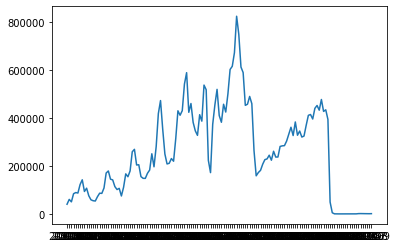

In [22]:
# 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

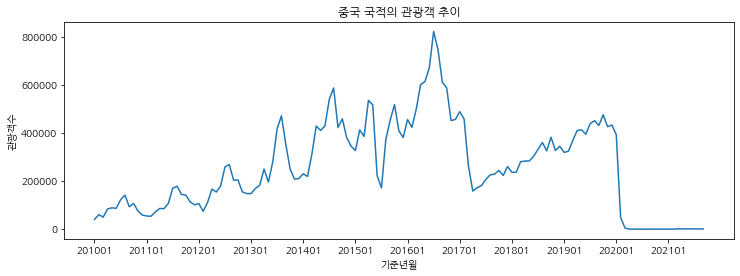

In [23]:
## 그래프 크기 조절 
plt.figure(figsize = (12, 4))
plt.rcParams["font.family"] = 'NanumGothic'
## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['201001', '201101', '201201', '201301', '201401', '201501', '201601', '201701', '201801', '201901', '202001', '202101'])

## 그래프 표현하기 
plt.show()

In [24]:
# 10년 관광객 수 상위 5개 
kto_2021.groupby('국적')['관광'].max().sort_values(ascending=False).head(5)

국적
중국    823016
일본    367157
대만    126421
미국     86508
홍콩     77904
Name: 관광, dtype: int64

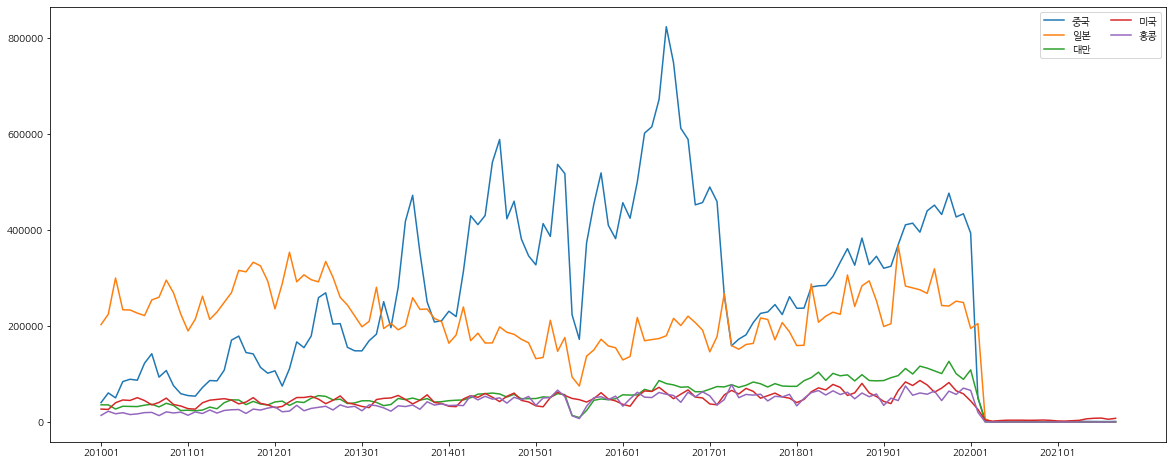

In [25]:
plt.figure(figsize = (20, 8))

plt.rcParams["font.family"] = 'NanumGothic'

country1 = kto_2021[kto_2021['국적'] == '중국']
country2 = kto_2021[kto_2021['국적'] == '일본']
country3 = kto_2021[kto_2021['국적'] == '대만']
country4 = kto_2021[kto_2021['국적'] == '미국']
country5 = kto_2021[kto_2021['국적'] == '홍콩']



plt.plot(country1['기준년월'], country1['관광'], label='중국')
plt.plot(country2['기준년월'], country2['관광'], label='일본')
plt.plot(country3['기준년월'], country3['관광'], label='대만')
plt.plot(country4['기준년월'], country4['관광'], label='미국')
plt.plot(country5['기준년월'], country5['관광'], label='홍콩')

plt.legend(loc='best', ncol=2) 


plt.xticks(['201001', '201101', '201201', '201301', '201401', '201501', '201601', '201701', '201801', '201901', '202001', '202101'])
plt.show()

### 히트맵 그래프 그리기

In [26]:
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '연도'
                         , columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns 

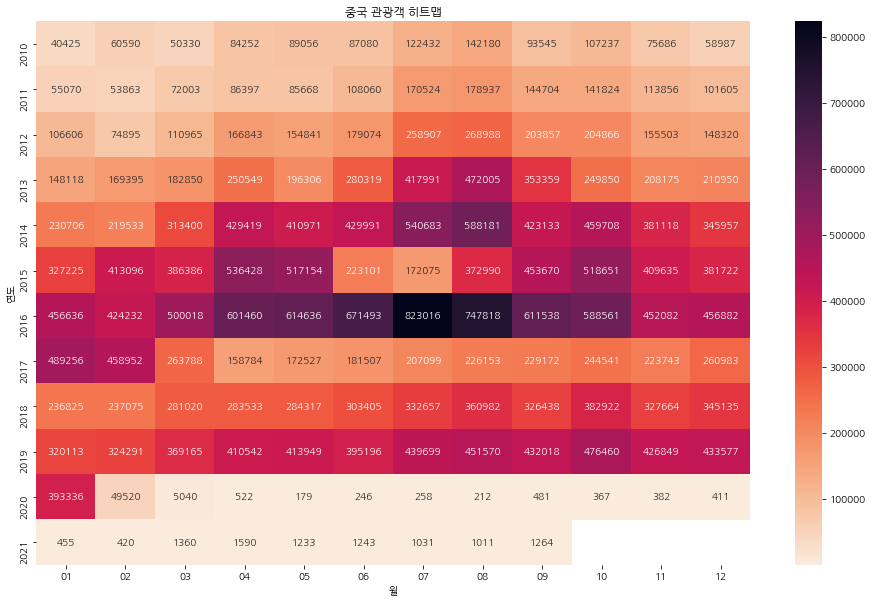

In [28]:
# 예제 3-50 히트맵 그리프 그리기 
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))
plt.rcParams["font.family"] = 'NanumGothic'
## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()